## making a video for one sensor for new year

In [2]:
import pandas as pd
import numpy as np

import pickle
#import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# data for new years for all cities, from get_data_new_years
with open('data/city_data_dfs.pickle', 'rb') as handle:
    city_data_dfs = pickle.load(handle)

In [4]:
sensor = city_data_dfs["Berlin"]["19_20"][["date_time","5afdcb33223bd8001995fb21"]].copy() # 19/20

In [5]:
del  city_data_dfs

In [6]:
# start at 2pm
sensor = sensor.loc[sensor.date_time.ge(pd.to_datetime("2019-12-31 14:00:00")),:]

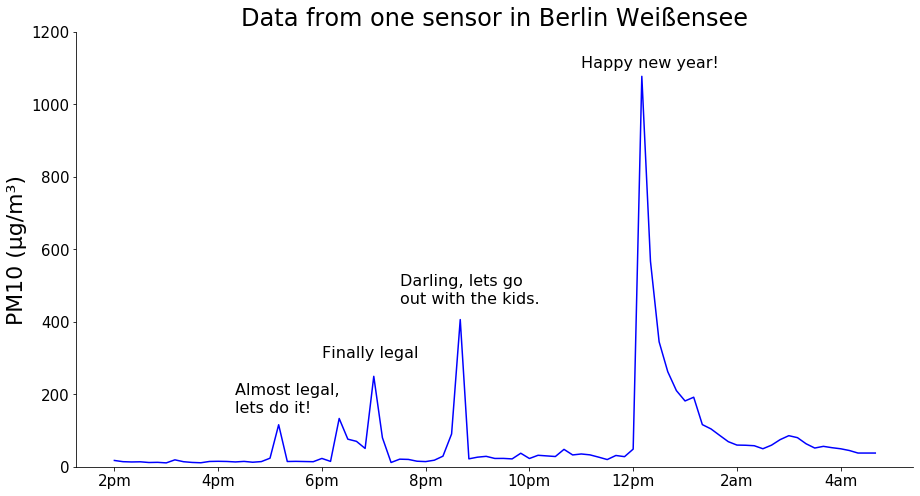

In [7]:
fig, ax = plt.subplots(figsize = (15,8))


x = list(sensor.date_time.values)
y = list(sensor.iloc[:,1])

n = len(x)

def f(k):
    return [x[0:k],x[0:k]]


# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []

for k in range(n-1):
    k_plot = ax.plot(x[0:k+1],y[0:k+1],color="blue", animated=True)
    
    # add text
    ## first peak
    if x[k] > pd.to_datetime("2019-12-31 17:05:00"):
        k_plot.append(plt.text(pd.to_datetime("2019-12-31 16:20:00"),
                               200,
                               "Almost legal,",
                               fontsize=16,
                               animated=True))
        k_plot.append(plt.text(pd.to_datetime("2019-12-31 16:20:00"),
                               150,
                               "lets do it!",
                               fontsize=16,
                               animated=True))
       
    ## second peaks
    if x[k] > pd.to_datetime("2019-12-31 18:00:00"):
        k_plot.append(plt.text(pd.to_datetime("2019-12-31 18:00:00"),
                               300,
                               "Finally legal",
                               fontsize=16,
                               animated=True))

    
    ## third peak
    if x[k] > pd.to_datetime("2019-12-31 20:30:00"):
        k_plot.append(plt.text(pd.to_datetime("2019-12-31 19:30:00"),
                               500,
                               "Darling, lets go",
                               fontsize=16,
                               animated=True))
        k_plot.append(plt.text(pd.to_datetime("2019-12-31 19:30:00"),
                               450,
                               "out with the kids.",
                               fontsize=16,
                               animated=True))   
    
    
    ## new year peak
    if x[k] > pd.to_datetime("2019-12-31 23:59:59"):
        k_plot.append(plt.text(pd.to_datetime("2019-12-31 23:00:00"),
                               1100,
                               "Happy new year!",
                               fontsize=16,
                               animated=True))


        

        

    
    ims.append(k_plot)

plt.ylabel('PM10 (µg/m³)', fontsize=22)
plt.title("Data from one sensor in Berlin Weißensee", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.set(ylim=[0,1200])

locs, labels = plt.xticks();
plt.xticks(locs, ("2pm","4pm","6pm","8pm","10pm","12pm","2am","4am"));
ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True)

# To save the animation, use e.g.

#ani.save("movie.mp4", writer=writer)



writer = FFMpegWriter(fps=5, metadata=dict(artist='Me'), bitrate=1800)
ani.save("berlin_19-20_animated.mp4", writer=writer)